<a href="https://colab.research.google.com/github/Seunsoipe/Machine-Learning-Algorithms-Checkpoint/blob/main/Machine_Learning_Algorithms_Checkpoint_(UnSupervised_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective

In this checkpoint, we are going to predict if a patient has chronic kidney disease or not using several classification algorithms of supervised learning. Then we will identify the inherent clusters within our data using clustering algorithms of unsupervised learning.

Instructions

Part1: supervised learning

Load the dataset of kidney disease.


- Apply logistic regression, and print the confusion matrix to validate your model. 

- Apply KNN and choose the optimal number of neighbors

- Apply decision tree, plot it and calculate the accuracy.

- Apply random forest, calculate the new accuracy and compare it with the previous result.

Part2: unsupervised learning

Drop out the target variable (named “classification”)

 - Use hierarchical clustering to identify the inherent groupings within your data.

 - Plot the clusters.

 - Plot the dendrogram. Use k-means clustering and select the optimal k.
 
 - Plot the clusters. 

In [1]:
import pandas as pd

In [2]:
from google.colab import files

uploaded = files.upload()

Saving kidney_disease.csv to kidney_disease.csv


In [3]:
data = pd.read_csv('kidney_disease.csv')

In [4]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Renaming the Columns

In [5]:
data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'class'},inplace=True)

In [6]:
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Data Preprocessing

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7   pus cell                 335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [8]:
#As we can see packed_cell_volume, white_blood_cell_count and red_blood_cell_count are object type. We need to change them to numerical dtype.

data['packed cell volume'] = pd.to_numeric(data['packed cell volume'], errors='coerce')
data['white blood cell count'] = pd.to_numeric(data['white blood cell count'], errors='coerce')
data['red blood cell count'] = pd.to_numeric(data['red blood cell count'], errors='coerce')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7   pus cell                 335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [10]:
#There is some ambiguity as to which columns should be removed.

data['diabetes mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

data['coronary artery disease'] = data['coronary artery disease'].replace(to_replace = '\tno', value='no')

data['class'] = data['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})



In [12]:
#Neccesary imports

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [13]:
# checking for null values

data.isna().sum().sort_values(ascending = False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
pus cell                    65
hemoglobin                  52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus cell clumps              4
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
anemia                       1
appetite                     1
pedal edema                  1
id                           0
class                        0
dtype: int64

In [14]:
#Let's drop columns not needed

data = data.drop(['id','red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
                  'packed cell volume', 'hypertension', 'diabetes mellitus', 'coronary artery disease',
                  'appetite', 'pedal edema', 'anemia', 'class'],  axis = 1)


In [15]:
data.head()

,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,white blood cell count,red blood cell count
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,6000.0,NaN
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,7500.0,NaN
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,7300.0,4.6


In [16]:
# checking for null values again

data.isna().sum().sort_values(ascending = False)

red blood cell count      131
white blood cell count    106
potassium                  88
sodium                     87
hemoglobin                 52
sugar                      49
specific gravity           47
albumin                    46
blood glucose random       44
blood urea                 19
serum creatinine           17
blood_pressure             12
age                         9
dtype: int64

In [19]:
#Let's fill using interpolate

data['red blood cell count'] = data['red blood cell count'].interpolate()
data['white blood cell count'] = data['white blood cell count'].interpolate()
data['potassium'] = data['potassium'].interpolate()
data['sodium'] = data['sodium'].interpolate()
data['hemoglobin'] = data['hemoglobin'].interpolate()
data['sugar'] = data['sugar'].interpolate()
data['specific gravity'] = data['specific gravity'].interpolate()
data['albumin'] = data['albumin'].interpolate()
data['blood glucose random'] = data['blood glucose random'].interpolate()
data['blood urea'] = data['blood urea'].interpolate()
data['serum creatinine'] = data['serum creatinine'].interpolate()
data['blood_pressure'] = data['blood_pressure'].interpolate()
data['age'] = data['age'].interpolate()

In [20]:
data.head()

,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,white blood cell count,red blood cell count
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,7800.0,5.200000
1,7.0,50.0,1.020,4.0,0.0,272.0,18.0,0.8,NaN,NaN,11.3,6000.0,4.766667
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,7500.0,4.333333
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.50,11.2,6700.0,3.900000
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,126.5,2.85,11.6,7300.0,4.600000


In [23]:
data.isna().sum().sort_values(ascending = False)

age                       0
blood_pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
white blood cell count    0
red blood cell count      0
dtype: int64

In [24]:
# data['sodium'].fillna(data['sodium'].mean(), inplace = True)
# data['potassium'].fillna(data['potassium'].mean(), inplace = True)

In [27]:
#Ckecking for outliers

import numpy as np

from scipy import stats

z = np.abs(stats.zscore(data)) #This convert to normal distribution

outliers = list(set(np.where(z >3)[0]))

len(outliers)

44

## Hierarchal Clustering

In [28]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score as ss


In [29]:
#finding the number of Agglomerative clusters
Agg_score = []

for i in range(2,15):
    model = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage ='ward')
    pre = model.fit_predict(data)
    Agg_score = ss(data, pre)
    print(i, 'score is : ', Agg_score)

2 score is :  0.5647351020366043
3 score is :  0.5269770923521166
4 score is :  0.5434900374122467
5 score is :  0.556793612722048
6 score is :  0.5506542573732228
7 score is :  0.5143924519090891
8 score is :  0.5459580649495183
9 score is :  0.5471019679211835
10 score is :  0.5467868127987494
11 score is :  0.5129266362024336
12 score is :  0.5024985257231547
13 score is :  0.4972599620461368
14 score is :  0.5010589509604545


In [30]:
#From the above the best cluster is 2



model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

In [31]:
data['CLUSTER'] = clust_labels

data.head()

,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,white blood cell count,red blood cell count,CLUSTER
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,136.86398,4.59471,15.4,7800.0,5.200000,1
1,7.0,50.0,1.020,4.0,0.0,272.0,18.0,0.8,136.86398,4.59471,11.3,6000.0,4.766667,1
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,136.86398,4.59471,9.6,7500.0,4.333333,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.00000,2.50000,11.2,6700.0,3.900000,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,126.50000,2.85000,11.6,7300.0,4.600000,1


In [32]:
cluster1 = data[data.CLUSTER ==0]
cluster2 = data[data.CLUSTER ==1]
print(cluster1['CLUSTER'].value_counts())
print(cluster2['CLUSTER'].value_counts())


0    173
Name: CLUSTER, dtype: int64
1    227
Name: CLUSTER, dtype: int64


## Visualizing and Plotting the Clusters

Text(0.5, 1.0, 'AGGLOMERATIVE CLUSTER COUNTS')

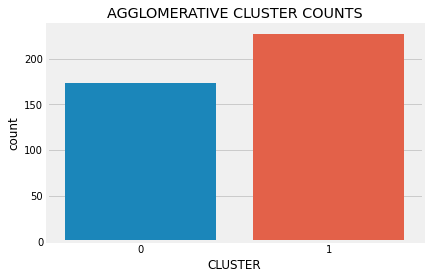

In [33]:
import seaborn as sb

sb.countplot(x = 'CLUSTER', data = data)
plt.title('AGGLOMERATIVE CLUSTER COUNTS')

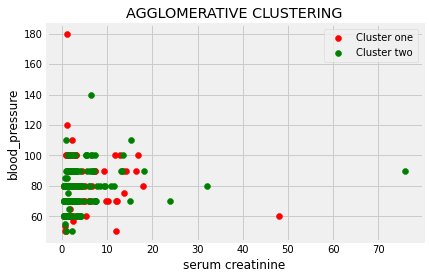

In [37]:
from matplotlib import pyplot as plt

plt.scatter(cluster1['serum creatinine'], cluster1['blood_pressure'], c = 'red', label = 'Cluster one')
plt.scatter(cluster2['serum creatinine'], cluster2['blood_pressure'], c = 'green', label = 'Cluster two')



plt.title('AGGLOMERATIVE CLUSTERING')
plt.xlabel('serum creatinine')
plt.ylabel('blood_pressure')
plt.legend()

## Plotting the Dendrogram

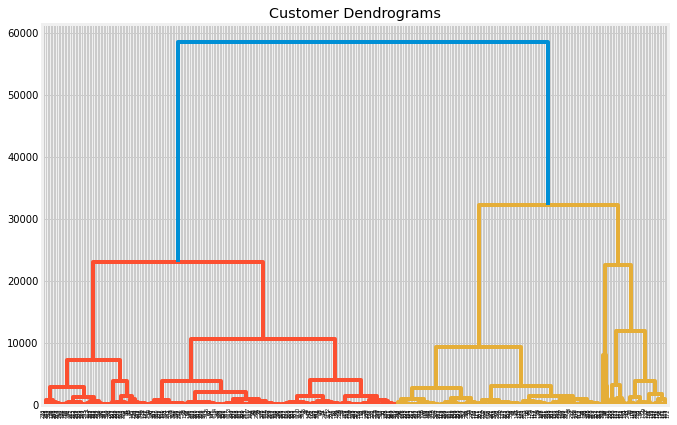

In [38]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="ward"))

## K-Means

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as ss

#Using silhouete score to determine the best number of clusters


sil_score =[]
for i in range(2,20):
    kmeans = KMeans(n_clusters = i, random_state = 50) 
    k_predict = kmeans.fit_predict(data)
    sil_score = ss(data, k_predict)
    print(i, 'score is : ', sil_score)

2 score is :  0.5647351318028675
3 score is :  0.5789206608505029
4 score is :  0.5404009396114009
5 score is :  0.5586939428754605
6 score is :  0.5438037091455089
7 score is :  0.5143163514954019
8 score is :  0.5309306072823988
9 score is :  0.5271226055228613
10 score is :  0.5544629473117739
11 score is :  0.533186717018791
12 score is :  0.5212864607406619
13 score is :  0.49713685611987674
14 score is :  0.5191851884732352
15 score is :  0.5190519338646307
16 score is :  0.49878307154891927
17 score is :  0.49901970456919303
18 score is :  0.5006342389325377
19 score is :  0.5036411913688916


In [41]:
kmeans = KMeans(n_clusters = 3, random_state = 50) ## is the best score from the above
k_pre = kmeans.fit_predict(data)
sscore = ss(data, k_pre)
print(sscore)





0.5789206608505029


In [40]:
centroids = kmeans.cluster_centers_

print(centroids)

[[ 4.93888889e+01  7.70833333e+01  1.01736111e+00  8.88888889e-01
   3.05555556e-01  1.38060185e+02  4.26925926e+01  2.06250000e+00
   1.40009259e+02  4.40995370e+00  1.28402778e+01  1.04671296e+04
   4.58349206e+00  0.00000000e+00]
 [ 4.54571429e+01  7.54285714e+01  1.01885714e+00  9.57142857e-01
   1.71428571e-01  1.21714286e+02  5.07285714e+01  4.12476190e+00
   1.33773810e+02  4.34023810e+00  1.31685714e+01  6.46952381e+03
   4.78314286e+00  1.00000000e+00]
 [ 5.90000000e+01  7.00000000e+01  1.01500000e+00  1.00000000e+00
   0.00000000e+00  9.35000000e+01  4.20000000e+01  1.55000000e+00
   1.30500000e+02  3.90000000e+00  1.00000000e+01  1.90000000e+04
   3.60000000e+00  0.00000000e+00]
 [ 4.72500000e+01  7.36111111e+01  1.01333333e+00  1.83333333e+00
   8.75000000e-01  1.84819444e+02  4.95000000e+01  5.93333333e+00
   1.32854167e+02  4.17708333e+00  1.12833333e+01  1.21902778e+04
   3.84476190e+00  1.11022302e-16]
 [ 5.12352941e+01  7.64705882e+01  1.01754902e+00  8.92156863e-01
  

## K-means Cluster Counts

False    365
True      35
Name: Clusters, dtype: int64


Text(0.5, 1.0, 'Cluster Counts')

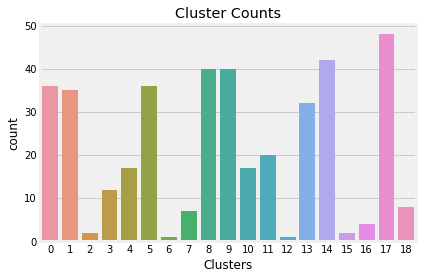

In [42]:
import seaborn as sb

data['Clusters'] = k_predict
print((data.Clusters ==1).value_counts())

sb.countplot(x = 'Clusters', data = data)
plt.title('Cluster Counts')

## Plotting the Clusters

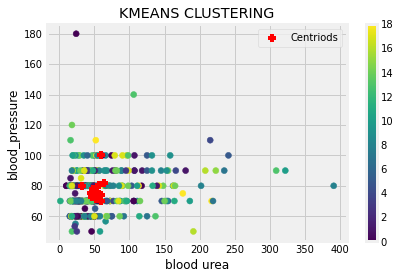

In [46]:

y = plt.scatter(data['blood urea'], data['blood_pressure'], c = data.Clusters)
plt.scatter(centroids[:,0], centroids[:,1], s = 80, c ='red', marker = '+' , label = "Centriods")

plt.title('KMEANS CLUSTERING')
plt.xlabel('blood urea')
plt.ylabel('blood_pressure')
plt.legend()
plt.colorbar(y)

## Elbow Method

Text(0.5, 1.0, 'Elbow method for Optimal K value')

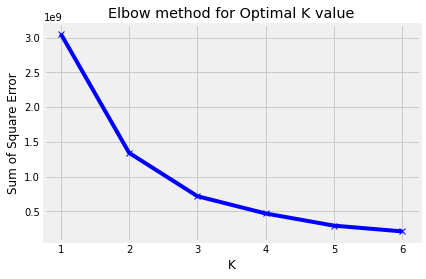

In [47]:
#Elbow Plot method is use to find the best number of clusters

k_range = range(1,7)
SSE = []# This is the sum of square error
for i in k_range:
    km = KMeans(n_clusters = i)
    km.fit(data)
    SSE.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of Square Error')
plt.plot(k_range, SSE, 'bx-')
plt.title('Elbow method for Optimal K value')

## Showing the optimal K

In [49]:
#From the above the Optimal K is 3

print(data[data.Clusters ==0].head(10))
print(data[data.Clusters ==1].head(10))
print(data[data.Clusters ==2].head(10))
print(data[data.Clusters ==3].head(10))

      age  blood_pressure  specific gravity  albumin  sugar  \
26   75.0            80.0             1.015      0.0    0.0   
55   35.0            80.0             1.005      3.0    0.0   
72   64.0            90.0             1.010      3.0    3.0   
99   56.0           180.0             1.015      0.0    4.0   
100  34.0            70.0             1.015      4.0    0.0   
101  71.0            90.0             1.015      2.0    0.0   
108  45.0            80.0             1.015      0.0    0.0   
109  54.0            70.0             1.015      0.0    0.0   
114  12.0            60.0             1.015      3.0    0.0   
118  55.0            70.0             1.010      3.0    0.0   

     blood glucose random  blood urea  serum creatinine      sodium  \
26                  156.0   45.000000              2.40  140.000000   
55                  169.5  117.333333              6.55  133.500000   
72                  146.0   35.000000              1.30  136.500000   
99                  29

## Interpretation

With two clusters, agglomerative clustering produced the highest silhouette value of 56% (0.564).



Clusters 3 give the highest silhouette value of 57% (0.578) for K-means clustering.

Similarly, using the elbow method, cluster 3 had the best K value.